In [12]:
import random
import math
import heapq
import time
import matplotlib.pyplot as plt
from collections import deque, defaultdict

In [13]:
import nbimporter
from graph_utilities import calculer_voisinage_etendu
from graph_utilities import lire_graphe, afficher_graphe, visualiser_graphe_par_etape
from graph_utilities import generate_cyclic_graph, generate_chain_graph, generate_spider_graph

prends en paramètre un graphe dans un état (càd avec des sommets brulés) et retourne le graphe dans l'état suivante

test_but : vérifie si tout les sommets sont brulées

## 1ère méthode

In [17]:
def choisir_sommet_aleatoire(etat_actuel):
    sommets_non_brules = [sommet for sommet, etat in etat_actuel.items() if etat == 0]
    return random.choice(sommets_non_brules) if sommets_non_brules else None


In [16]:
def choisir_sommet_a_bruler(graphe, etat_actuel):
    """
    Sélectionne un sommet non brûlé ayant le maximum de voisins.
    
    :param graphe: Le graphe sous forme de dictionnaire (liste d'adjacence).
    :param etat_actuel: Dictionnaire contenant l'état actuel des sommets.
    :return: Le sommet non brûlé avec le maximum de voisins, ou None si aucun sommet disponible.
    """
    # Trouver les sommets non brûlés
    sommets_non_brules = [sommet for sommet, etat in etat_actuel.items() if etat == 0]
    
    if not sommets_non_brules:
        # Aucun sommet non brûlé
        return None

    # Trouver le sommet avec le maximum de voisins
    sommet_max_voisins = max(sommets_non_brules, key=lambda sommet: len(graphe.get(sommet, [])))

    return sommet_max_voisins


In [18]:
def recherche_profondeur(graphe):
    """
    Algorithme générique de recherche pour brûler un graphe en choisissant un sommet par étape.
    :param graphe: Le graphe sous forme de dictionnaire (liste d'adjacence).
    :param etat_initial: Dictionnaire représentant l'état initial des sommets (brûlés ou non brûlés).
    :param successeurs: Fonction qui génère l'état suivant (propagation).
    :param test_but: Fonction qui vérifie si tous les sommets sont brûlés.
    :return: Chemin (liste des états successifs), sommets brûlés activement à chaque étape, et coût total.
    """
    # Initialisation : créer la liste des états à traiter
    etat_initial = {sommet: 0 for sommet in graphe}
    etats_a_traiter = deque([{"etat": etat_initial, "cout": 1, "brules_actifs": []}])

    while etats_a_traiter:
        # Extraire un état
        noeud = etats_a_traiter.pop()

        noeud["etat"], brulage = successeurs(graphe, noeud["etat"])

        if brulage:
            noeud["cout"] += 1  # Chaque étape coûte 1

        # Vérifier si tous les sommets sont brûlés
        if test_but(noeud["etat"]):
            return noeud["brules_actifs"], noeud["cout"]

        # Choisir un nouveau sommet à brûler activement
        nouveau_sommet = choisir_sommet_a_bruler(graphe, noeud["etat"])
        #nouveau_sommet = choisir_sommet_aleatoire(noeud["etat"])
        if nouveau_sommet is None:
            # Si aucun sommet à brûler n'est disponible, retourner l'état actuel
            continue

        # Copier l'état courant
        etat_suivant = noeud["etat"].copy()

        # Marquer le sommet comme "brûlé"
        etat_suivant[nouveau_sommet] = 1

        # Ajouter le nouvel état à la liste des états à traiter
        etats_a_traiter.append({
            "etat": etat_suivant,
            "cout": noeud["cout"],  # Chaque étape coûte 1
            "brules_actifs": noeud["brules_actifs"] + [nouveau_sommet]
        })

    # Si aucun état final n'est trouvé
    return [], float("inf")


etape 1 :

parcours en largeur : popleft de la liste des états à traiter

parcours en largeur itéré : livre artificial intelligence section 3.4.4 et 3.4.5


etape 2 : couverture des balles

appliquer le A* dans le parcours

bruler ce noeuds pendant un certain temps
=> couverture par des balles

l'ensemble des action : 
le cout : la taille de la grande balle
fixer burning number dés le début (6)


# 2éme méthode

In [91]:
def successeurs(graphe, etat_actuel, cout_actuel):
    """
    Génère l'état suivant en propageant la brûlure aux voisins des sommets déjà brûlés.
    :param graphe: Le graphe sous forme de dictionnaire.
    :param etat_actuel: Dictionnaire contenant l'état actuel des sommets (brûlés ou non brûlés).
    :return: Nouveau dictionnaire représentant l'état des sommets après propagation.
    """

    # Copier l'état actuel pour générer le nouvel état
    nouvel_etat = etat_actuel.copy()

    # Récupérer tous les sommets brûlés
    sommets_brules = [sommet for sommet, etat in nouvel_etat.items() if etat == 1]

    # Propager la brûlure aux voisins des sommets brûlés
    for sommet in sommets_brules:
        for voisin in graphe.get(sommet, []):  # Obtenir les voisins dans la liste d'adjacence
            if nouvel_etat[voisin] == 0:  # Brûler uniquement les sommets non brûlés
                nouvel_etat[voisin] = 1
                #cout_actuel += 1  # Incrémenter le coût de propagation

    return nouvel_etat, cout_actuel

In [66]:
def test_but(etat_actuel):
    """
    Vérifie si tous les sommets du graphe sont brûlés.
    :param etat_actuel: Dictionnaire contenant l'état actuel des sommets (brûlés ou non brûlés).
    :return: True si tous les sommets sont brûlés, False sinon.
    """
    return all(etat == 1 for etat in etat_actuel.values())

In [ ]:
def recherche_largeur(graphe):
    """
    Algorithme générique de recherche en largeur pour brûler un graphe.
    À chaque étape, chaque sommet est exploré pour générer tous les états possibles.
    :param graphe: Le graphe sous forme de dictionnaire (liste d'adjacence).
    :param etat_initial: Dictionnaire représentant l'état initial des sommets (brûlés ou non brûlés).
    :param successeurs: Fonction qui génère l'état suivant (propagation).
    :param test_but: Fonction qui vérifie si tous les sommets sont brûlés.
    :return: Chemin (liste des états successifs), sommets brûlés activement à chaque étape, et coût total.
    """
    # Initialisation : file (FIFO) pour gérer les états à traiter
    etat_initial = {sommet: 0 for sommet in graphe}
    etats_a_traiter = deque([{"etat": etat_initial, "cout": 1, "brules_actifs": set([])}])

    while etats_a_traiter:
        # Extraire un état de la file (FIFO)
        etat = etats_a_traiter.popleft()

        # Vérifier si tous les sommets sont brûlés
        if test_but(etat["etat"]):
            return list(etat["brules_actifs"]), etat["cout"]
        
        # Propager l'état courant (brûlage des voisins déjà brûlés)
        etat["etat"], cout = successeurs(graphe, etat["etat"], etat["cout"])

        # Générer tous les nouveaux états possibles en brûlant chaque sommet non brûlé
        for sommet in graphe:
            if etat["etat"].get(sommet) != 1:  # Si le sommet n'est pas encore brûlé
                # Copier l'état courant
                etat_suivant = etat["etat"].copy()

                # Marquer le sommet comme "brûlé"
                etat_suivant[sommet] = 1

                # Ajouter le nouvel état à la file
                etats_a_traiter.append({
                    "etat": etat_suivant,
                    "cout": cout,
                    "brules_actifs": etat["brules_actifs"] | set([sommet])
                })

    # Si aucun état final n'est trouvé
    return [], float("inf")


---

### variante 1

In [158]:
def propager(graphe, etat_actuel, cout_actuel):
    """
    Propage la brûlure aux voisins des sommets déjà brûlés (un "pas" de propagation),
    en incrémentant le coût à chaque fois qu'un nouveau sommet est enflammé.
    
    Retourne (nouvel_etat, cout_apres_propagation).
    """
    nouvel_etat = etat_actuel.copy()
    
    # Récupérer tous les sommets brûlés
    sommets_brules = [s for s, etat in nouvel_etat.items() if etat == 1]

    # Propager la brûlure aux voisins
    for sommet in sommets_brules:
        for voisin in graphe.get(sommet, []):
            if nouvel_etat[voisin] == 0:  # s’il n’était pas brûlé
                nouvel_etat[voisin] = 1
                #cout_actuel += 1  # Incrémenter le coût de propagation

    return nouvel_etat, cout_actuel

def successeurs(graphe, etat_actuel, cout_actuel):
    """
    Génère TOUS les états possibles en allumant manuellement
    chaque sommet non brûlé, puis en propageant le feu.
    
    Pour chacun, on renvoie le triplet (action, nouvel_etat, cout_action),
    où:
      - action       = le sommet qu'on a allumé
      - nouvel_etat  = l'état après allumage + propagation
      - cout_action  = le coût "supplémentaire" induit par cet allumage (et sa propagation)
    """
    liste_succ = []
    
    # Pour chaque sommet non brûlé, on simule "allumer ce sommet"
    for sommet in graphe:
        if etat_actuel[sommet] == 0:
            # 1) On copie l'état
            nouvel_etat = etat_actuel.copy()
            
            # 3) On propage la brûlure (un "pas" de propagation)
            nouvel_etat_propage, nouveau_cout = propager(graphe, nouvel_etat, cout_actuel)
            
            # 2) On allume manuellement ce sommet
            nouvel_etat_propage[sommet] = 1
            
            # 4) Le "coût d'action" = la différence entre le coût après et avant
            #    (autrement dit, combien on a dû payer en plus pour cet allumage + propagation)
            #cout_action = nouveau_cout - cout_actuel
            cout_action = 1
            
            # 5) On ajoute ce successeur à la liste
            liste_succ.append( (sommet, nouvel_etat_propage, cout_action) )
    
    return liste_succ

def test_but(etat_actuel):
    """
    Vérifie si tous les sommets sont brûlés.
    """
    return all(val == 1 for val in etat_actuel.values())

def recherche_largeurt(graphe):
    """
    Traduit directement le pseudo-code "Algorithme 1" en Python,
    en utilisant la fonction 'successeurs' (qui retourne des triplets)
    et 'test_but'.
    
    :param graphe:        dictionnaire {sommet: [voisins]}
    :param etat_initial:  dictionnaire {sommet: 0/1}
    :param successeurs:   fonction(etat, cout) -> liste de (action, etat_suivant, cout_action)
    :param test_but:      fonction(etat) -> bool
    :return: (etat_solution, chemin_actions, cout_total) 
             ou (None, [], float("inf")) si on ne trouve pas de solution
    """
    etat_initial = {sommet: 0 for sommet in graphe}

    # 1) Construire le nœud initial = (état=etat_initial, chemin=[], coût=0)
    noeud_initial = {
        "etat": etat_initial,
        "chemin": [],
        "cout": 0
    }
    
    # 2) Mettre le nœud initial dans une file FIFO
    file = deque([noeud_initial])
    
    # 3) Tant que la file n'est pas vide
    while file:
        noeud = file.popleft()
        etat_courant = noeud["etat"]
        chemin_courant = noeud["chemin"]
        cout_courant = noeud["cout"]
        
        # -- Test but --
        if test_but(etat_courant):
            return etat_courant, chemin_courant, cout_courant
        
        # -- Parcourir tous les successeurs --
        #    successeurs(...) doit retourner [(action, etat_suivant, cout_action), ...]
        for (action, etat_suivant, cout_action) in successeurs(graphe, etat_courant, cout_courant):
            # Nouveau coût
            nouveau_cout = cout_courant + cout_action
            # Nouveau chemin
            nouveau_chemin = chemin_courant + [action]
            
            # Créer le noeud successeur
            noeud_suivant = {
                "etat": etat_suivant,
                "chemin": nouveau_chemin,
                "cout": nouveau_cout
            }
            # L'insérer dans la file
            file.append(noeud_suivant)
    
    # 4) Si on sort de la boucle, pas de solution trouvée
    return None, [], float("inf")

# --- Exemple sur un graphe de type chaîne de 9 sommets ---

etat, sommets_actifs_l, cout = recherche_largeurt(graphe)
sommets_actifs_l, cout


([3, 9, 13, 15], 4)

### variante 2

In [121]:
from collections import deque

def test_but(B, graphe):
    """
    Retourne True si l'ensemble B des sommets brûlés est égal à l'ensemble
    de tous les sommets du graphe.
    """
    return B == set(graphe.keys())

def successeurs(graphe, B):
    """
    Pour un état donné (ensemble B de sommets déjà brûlés), 
    génère TOUS les états accessibles par l'ignition manuelle d'un sommet non brûlé.
    
    L'action consiste à allumer manuellement un sommet v (qui n'est pas encore dans B)
    puis à brûler immédiatement ses voisins.
    
    Retourne une liste de triplets :
      (v, B_new, cout_action)
    où :
      - v         : le sommet allumé manuellement
      - B_new     : l'ensemble mis à jour = B ∪ {v} ∪ N(v)
      - cout_action : 1 (le coût d'une ignition manuelle)
    """
    liste_succ = []
    for v in graphe:
        if v not in B:
            # Nouvelle ignition manuelle de v
            B_new = set(B)         # copier l'état courant
            B_new.add(v)           # brûler v manuellement
            # Propagation immédiate : brûler les voisins de v
            for w in graphe.get(v, []):
                B_new.add(w)
            liste_succ.append((v, B_new, 1))
    return liste_succ

def recherche_largeur(graphe):
    """
    Recherche en largeur exhaustive dans l'espace des états, où chaque transition
    correspond à l'ignition manuelle d'un sommet (suivie d'une propagation d'un pas).
    
    Chaque nœud de l'espace est un dictionnaire contenant :
      - "burned" : ensemble des sommets brûlés jusqu'à présent
      - "cost"   : nombre d'ignitions manuelles effectuées
      - "seq"    : séquence (liste) des sommets allumés manuellement (dans l'ordre)
    
    La fonction explore toutes les possibilités (en évitant de revisiter le même état)
    et renvoie la séquence d'ignitions minimale (et son coût) qui permet de brûler exactement tout le graphe.
    """
    # État initial : aucun sommet brûlé
    etat_initial = {"burned": set(), "cost": 0, "seq": []}
    file = deque([etat_initial])
    visites = set()
    visites.add(frozenset(etat_initial["burned"]))
    
    best_solution = None
    best_cost = float("inf")
    
    while file:
        etat = file.popleft()
        B = etat["burned"]
        cost = etat["cost"]
        seq = etat["seq"]
        
        # Si on a brûlé tous les sommets, c'est une solution
        if test_but(B, graphe):
            if cost < best_cost:
                best_cost = cost
                best_solution = seq
            # On continue à explorer pour éventuellement trouver une solution de coût égal
            continue
        
        for (v, B_new, cout_action) in successeurs(graphe, B):
            new_cost = cost + cout_action
            new_seq = seq + [v]
            etat_key = frozenset(B_new)
            if etat_key not in visites:
                visites.add(etat_key)
                file.append({"burned": B_new, "cost": new_cost, "seq": new_seq})
    
    if best_solution is None:
        return [], float("inf")
    return best_solution, best_cost

# --- Exemple sur un graphe de type chaîne de 9 sommets ---
# Graphe en chaîne : 0-1-2-3-4-5-6-7-8

solution, cout = recherche_largeur(graphe)
print("Séquence d'ignitions manuelles :", solution)
print("Coût total (nombre d'ignitions) :", cout)


Séquence d'ignitions manuelles : [1, 4, 7]
Coût total (nombre d'ignitions) : 3


### Suite

In [99]:
etat, sommets_actifs_l, cout = recherche_largeurt(graphe)
sommets_actifs_l, cout

([0, 3, 7], 3)

In [151]:
# 10 sommets (3.16)
fichier = r'instances\Stranke94\Stranke94.mtx'

# 29 sommets (5.38)
#fichier = r'instances\bn-mouse_visual-cortex_1\bn-mouse_visual-cortex_1.mtx'

# 34 sommets (5,83)
#fichier = r'instances\karate\karate.mtx'

# 62 sommets (7.87)
#fichier = r'instances\dolphins\dolphins.mtx'

# 105 sommets (12.88)
#fichier = r'instances\polbooks\polbooks.mtx'

# 258 sommets (16.06)
#fichier = r'instances\sphere3\sphere3.mtx'

# 379 sommets (19.47)
#fichier = r'instances\ca-netscience\ca-netscience.mtx'

# 7057 sommets (84.005)
#fichier = r'instances\fb-pages-government\fb-pages-government.mtx'

# 11631 sommets (107.84)
#fichier = r'instances\web-wiki-crocodile\web-wiki-crocodile.mtx'

# 196 591 sommets (443.38)
#fichier = r'instances\loc-gowalla_edges\loc-gowalla_edges.mtx'

graphe = lire_graphe(fichier)

In [157]:
# Graphe cyclique (4)
#graphe = generate_cyclic_graph(16)

# Graphe en chaîne (4)
#graphe = generate_chain_graph(9)
graphe = generate_chain_graph(16)

# Graphe en étoile/spider (4.58)
#graphe = generate_spider_graph(0, leg_length=4, num_legs=5)

In [23]:
#sommets_actifs_p, cout = recherche_profondeur(graphe)
#
#print("*********** Parcours en profondeur ***********")
#print("Sommets brûlés à chaque étape:", sommets_actifs_p)
#print("Coût total:", cout)

In [33]:
sommets_actifs_l, cout = recherche_largeur(graphe)

print("*********** Parcours en largeur ***********")
print("Sommets brûlés à chaque étape:", sommets_actifs_l)
print("Coût total:", cout)

*********** Parcours en largeur ***********
Sommets brûlés à chaque étape: [0, 3, 7]
Coût total: 4


dire un sommet va etre brulé au 3 tour par exemple
notre solution (du 2eme algo) sera le  centre (sommet) de la boule ayant le rayon le plus grand

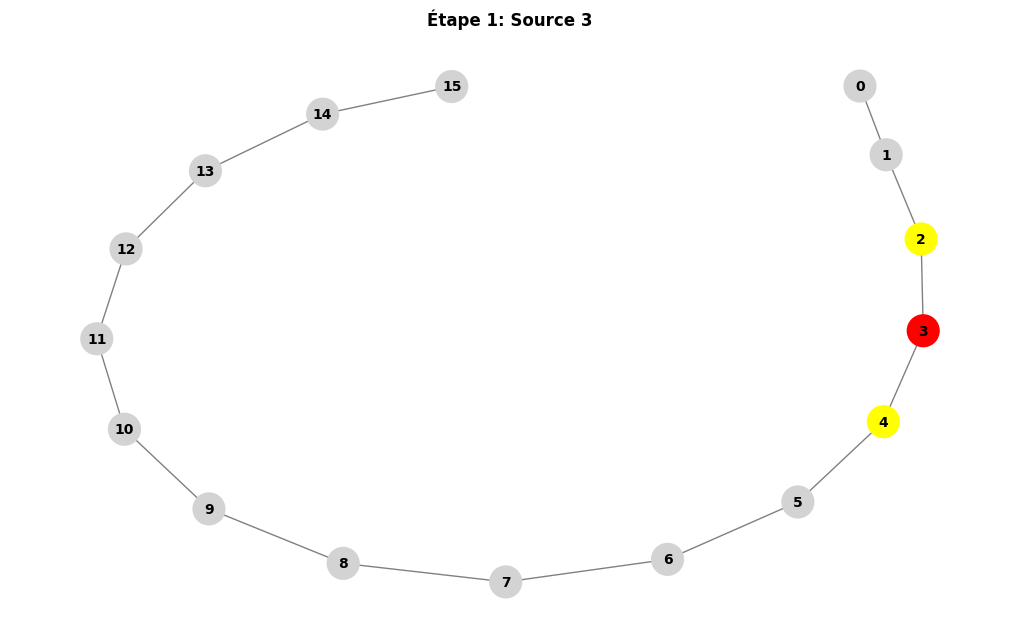

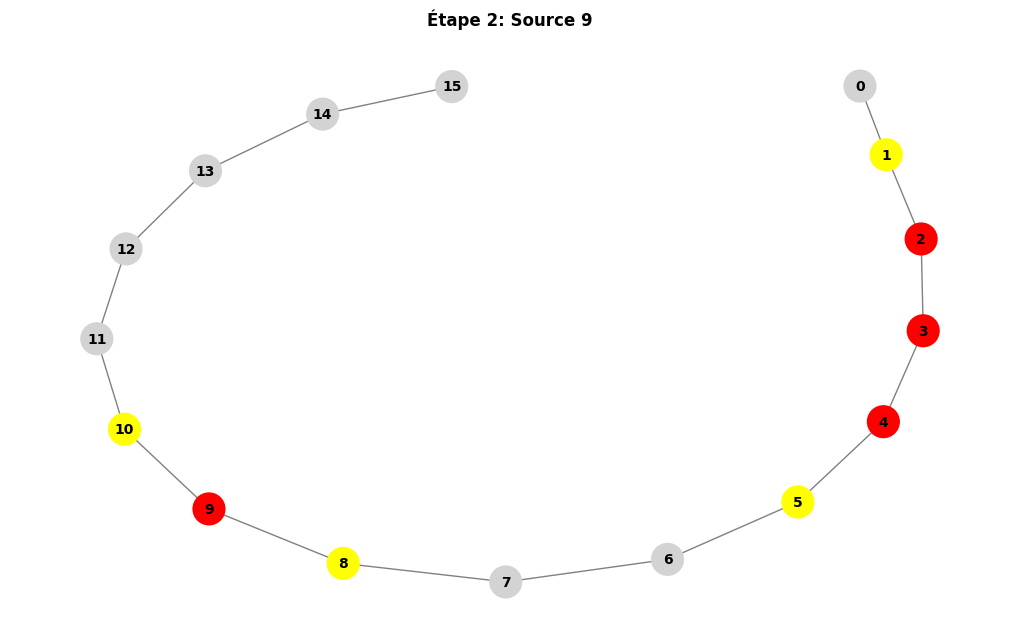

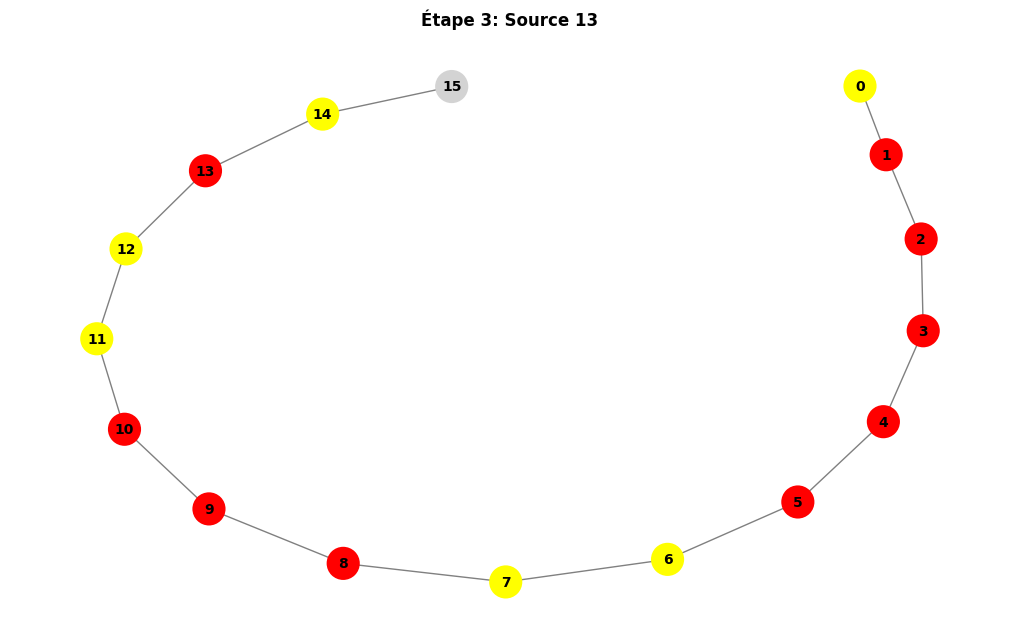

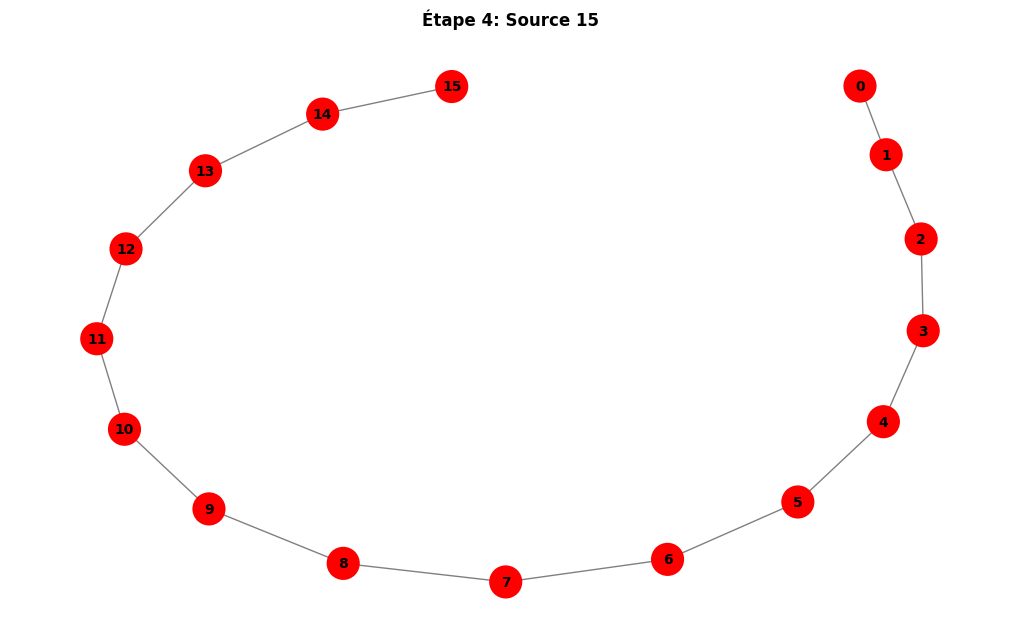

In [159]:
# Visualiser le graphe par étape
visualiser_graphe_par_etape(graphe, sommets_actifs_l)


# Couverture des balles

### Définition clarifiée des balles :
1. **Rayon de la balle** :
   - Le rayon $ r $ détermine combien de niveaux de voisins (profondeur dans le graphe) la balle peut atteindre depuis son centre $ U $.
   - Par exemple :
     - Rayon 1 : Brûle uniquement les voisins directs de $ U $.
     - Rayon 2 : Brûle les voisins de $ U $ et les voisins des voisins de $ U $.

2. **Centre de la balle** :
   - Chaque balle a un centre $ U $, qui est un sommet du graphe. À partir de ce centre, la brûlure se propage jusqu’à une profondeur $ r $.

3. **Objectif** :
   - Trouver un ensemble de balles ($ U_i, r_i $) qui couvrent **tout le graphe**.
   - Chaque sommet du graphe doit être brûlé par au moins une balle.

4. **Contraintes** :
   - Les **rayons des balles doivent être différents**.
   - Toutes les combinaisons possibles de balles (centres et rayons) doivent être explorées pour garantir que le graphe est entièrement couvert.

5. **Propagation de la brûlure** :
   - La propagation de la brûlure à une profondeur $ r $ peut être simulée par un parcours en largeur (BFS) depuis le sommet $ U $, en limitant la profondeur de l’exploration à $ r $.

---

n <- nombre de sommet dans le graphe
r <- math.ceil(math.sqrt(n))
s <- sommet ayant le max de voisins pour commencer

tant que graphe non brulé :
    bruler graphe depuis sommet s avec rayon r
    si tout graphe est brulé :
        retourner (s,r)
    sinon :
        stocker dans la liste (s,r)
        bruler graphe depuis sommet s avec rayon r
        r <- r-1
        sb_base <- calculer nombre sommet non brulé
        pour tout sommet u non brulés :
            bruler graphe depuis u avec rayon r
            sb <- calculer nombre sommet non brulé associé au sommet u
            si tout graphe est brulé :
                r <- r-1
            sinon si sb < sb_base :
                sb_base <- sb
                u_base <- u

In [26]:
def bruler(graphe, u, r):
    """
    Effectue une BFS depuis le sommet u en limitant la profondeur à r.
    Retourne l'ensemble des sommets brûlés (atteints).
    """
    visited = {u}
    queue = deque([(u, 0)])  # (sommet, profondeur)
    while queue:
        current, depth = queue.popleft()
        if depth < r:
            for neighbor in graphe.get(current, []):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, depth + 1))
    return visited

In [27]:
def couverture_balle(graphe):
    """
    Cherche une séquence de balles (centre, rayon) qui couvre entièrement le graphe.
    
    Contraintes :
      - Les rayons possibles sont 1, 2, ..., ⌈√n⌉ où n = nombre de sommets.
      - Un même rayon ne peut être utilisé qu'une seule fois dans une solution.
      - On explore d'abord les grandes valeurs de rayon (pour potentiellement réduire
        rapidement le nombre de balles et/ou le rayon maximal utilisé).
      
    Retourne la séquence des balles (centre, rayon) de la solution trouvée.
    """

    n = len(graphe)
    V = list(graphe.keys())
    best_sequence = None
    best_max_r = float('inf')
    best_num_balls = float('inf')
    max_rayon_possible = math.ceil(math.sqrt(n))
    #max_rayon_possible = round(math.sqrt(n))
    
    # File de priorité (heap) avec pour chaque état :
    # (heuristique, rayon_max_actuel, nombre_de_balles, sommets_brulés, séquence, rayons_utilisés)
    heap = []
    heapq.heappush(heap, (0, 0, 0, set(), [], set()))
    
    # Dictionnaire de mémorisation pour éviter de revisiter des états moins optimaux
    memo = defaultdict(lambda: (float('inf'), float('inf')))
    
    while heap:
        heur, current_max_r, current_num, brules, seq, used_r = heapq.heappop(heap)
        
        # Élagage : si l'état courant est moins bon que la meilleure solution trouvée, on passe
        # On passe cette branche si l'on sait déjà qu'elle est moins bonne que la meilleure solution trouvée
        if current_max_r > best_max_r or (current_max_r == best_max_r and current_num >= best_num_balls):
            continue
        
        # Si tous les sommets sont brûlés, on met à jour la meilleure solution
        if len(brules) == n:
            if current_max_r < best_max_r or (current_max_r == best_max_r and current_num < best_num_balls):
                best_max_r, best_num_balls, best_sequence = current_max_r, current_num, seq
            continue
        
        # Pour chaque sommet non brûlé, on essaie de l'étendre avec différents rayons
        for v in V:
            if v not in brules:
                # On ne considère pas un rayon supérieur à celui maximum autorisé
                # ni supérieur à best_max_r (pour rester dans une solution potentiellement optimale)
                max_possible_r = min(max_rayon_possible, best_max_r)
                # On explore les grands rayons en premier
                for r in range(max_possible_r - 1, -1, -1): # source de problèèèèèmes
                    # faire un vecteur de rayons utilisés
                    # used_r = [0 for _ in range(max_rayon_possible + 1)]
                    # used_r = [1,1,0,1]
                    if r in used_r:
                        continue  # Ce rayon a déjà été utilisé dans la séquence courante
                    
                    # Calcul à la demande des sommets brûlés par la balle (v, r)
                    burned_with_ball = bruler(graphe, v, r)
                    nouveaux_brules = brules | burned_with_ball
                    new_max_r = max(current_max_r, r)
                    new_num = current_num + 1
                    
                    # Clé pour mémorisation : combinaison des sommets brûlés et des rayons utilisés
                    key = (frozenset(nouveaux_brules), frozenset(used_r | {r}))
                    if (new_max_r, new_num) >= memo[key]:
                        continue
                    memo[key] = (new_max_r, new_num)
                    
                    # Heuristique : rayon maximal utilisé + fraction des sommets restants
                    # l'algorithme donne plus de poids à la minimisation du rayon maximal, mais prend aussi en compte la progression.
                    remaining = n - len(nouveaux_brules)
                    heuristic = new_max_r + (remaining / n)
                    heapq.heappush(heap, (heuristic, new_max_r, new_num, nouveaux_brules, seq + [(v, r)], used_r | {r}))
    
    
    # Optionnel : trier la séquence par rayon décroissant (similaire à la version initiale)
    res = sorted(best_sequence, key=lambda x: x[1], reverse=True)
    res = [(center, rayon + 1) for center, rayon in res]
    return res


In [28]:
def couverture_balle_zero_un(graphe):
    """
    Cherche une séquence de balles (centre, rayon) qui couvre entièrement le graphe.
    
    Contraintes :
      - Les rayons possibles sont 1, 2, ..., ⌈√n⌉ où n = nombre de sommets.
      - Un même rayon ne peut être utilisé qu'une seule fois dans une solution.
      - On explore d'abord les grandes valeurs de rayon (pour potentiellement réduire
        rapidement le nombre de balles et/ou le rayon maximal utilisé).
      
    Retourne la séquence des balles (centre, rayon) de la solution trouvée.
    """

    n = len(graphe)
    V = list(graphe.keys())
    best_sequence = None
    best_max_r = float('inf')
    best_num_balls = float('inf')
    max_rayon_possible = math.ceil(math.sqrt(n))
    #max_rayon_possible = round(math.sqrt(n))
    
    # File de priorité (heap) avec pour chaque état :
    # (heuristique, rayon_max_actuel, nombre_de_balles, sommets_brulés, séquence, rayons_utilisés)
    heap = []
    initial_used_r = [0] * max_rayon_possible
    heapq.heappush(heap, (0, 0, 0, set(), [], initial_used_r))
    
    # Dictionnaire de mémorisation pour éviter de revisiter des états moins optimaux
    memo = defaultdict(lambda: (float('inf'), float('inf')))
    
    while heap:
        heur, current_max_r, current_num, brules, seq, used_r = heapq.heappop(heap)
        
        # Élagage : si l'état courant est moins bon que la meilleure solution trouvée, on passe
        # On passe cette branche si l'on sait déjà qu'elle est moins bonne que la meilleure solution trouvée
        if current_max_r > best_max_r or (current_max_r == best_max_r and current_num >= best_num_balls):
            continue
        
        # Si tous les sommets sont brûlés, on met à jour la meilleure solution
        if len(brules) == n:
            if current_max_r < best_max_r or (current_max_r == best_max_r and current_num < best_num_balls):
                best_max_r, best_num_balls, best_sequence = current_max_r, current_num, seq
            continue
        
        # Pour chaque sommet non brûlé, on essaie de l'étendre avec différents rayons
        for v in V:
            if v not in brules:
                # On ne considère pas un rayon supérieur à celui maximum autorisé
                # ni supérieur à best_max_r (pour rester dans une solution potentiellement optimale)
                max_possible_r = min(max_rayon_possible, best_max_r)
                # On explore les grands rayons en premier
                for r in range(max_possible_r, 0, -1):
                    if used_r[r-1]:
                        continue  # Ce rayon a déjà été utilisé dans la séquence courante
                    
                    # Calcul à la demande des sommets brûlés par la balle (v, r)
                    burned_with_ball = bruler(graphe, v, r)
                    nouveaux_brules = brules | burned_with_ball
                    new_max_r = max(current_max_r, r)
                    new_num = current_num + 1
                    
                    # Clé pour mémorisation : combinaison des sommets brûlés et des rayons utilisés
                    key = (frozenset(nouveaux_brules), frozenset(used_r | {r}))
                    if (new_max_r, new_num) >= memo[key]:
                        continue
                    memo[key] = (new_max_r, new_num)
                    
                    # Heuristique : rayon maximal utilisé + fraction des sommets restants
                    # l'algorithme donne plus de poids à la minimisation du rayon maximal, mais prend aussi en compte la progression.
                    remaining = n - len(nouveaux_brules)
                    heuristic = new_max_r + (remaining / n)
                    heapq.heappush(heap, (heuristic, new_max_r, new_num, nouveaux_brules, seq + [(v, r)], used_r | {r}))
    
    
    # Optionnel : trier la séquence par rayon décroissant (similaire à la version initiale)
    res = sorted(best_sequence, key=lambda x: x[1], reverse=True)
    res = [(center, rayon + 1) for center, rayon in res]
    return res


In [29]:
sequence_opt = couverture_balle(graphe)
cout_bb = max([rayon for centre, rayon in sequence_opt])

sequence_opt

[(6, 3), (2, 2), (0, 1)]

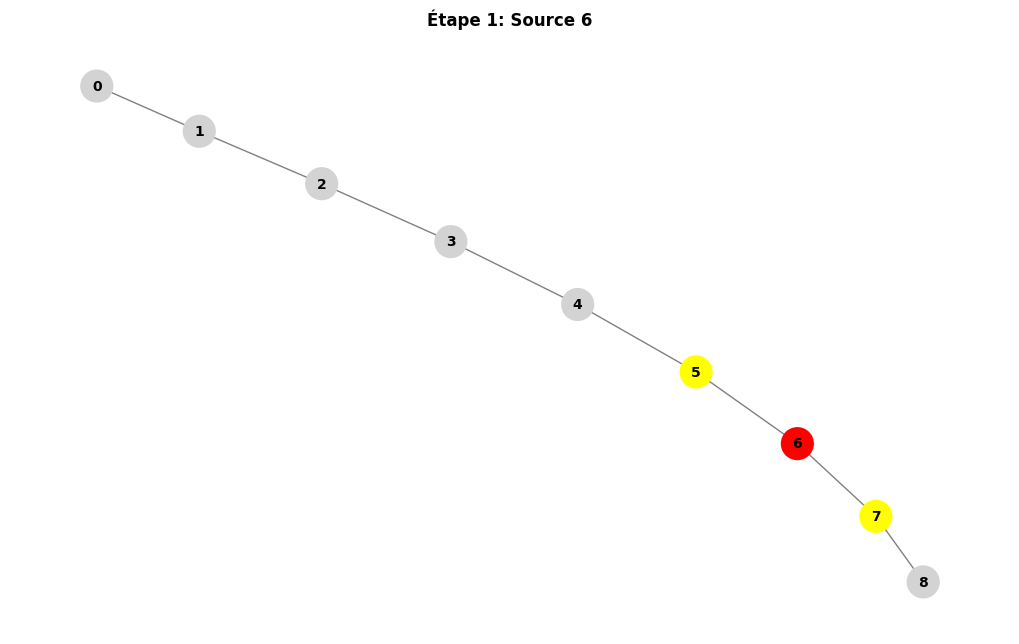

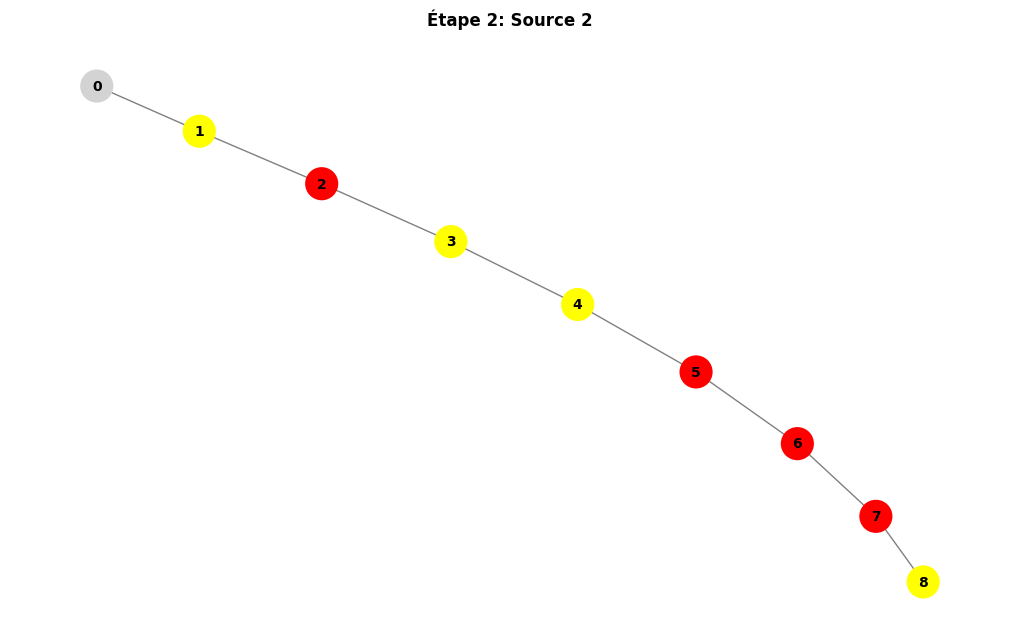

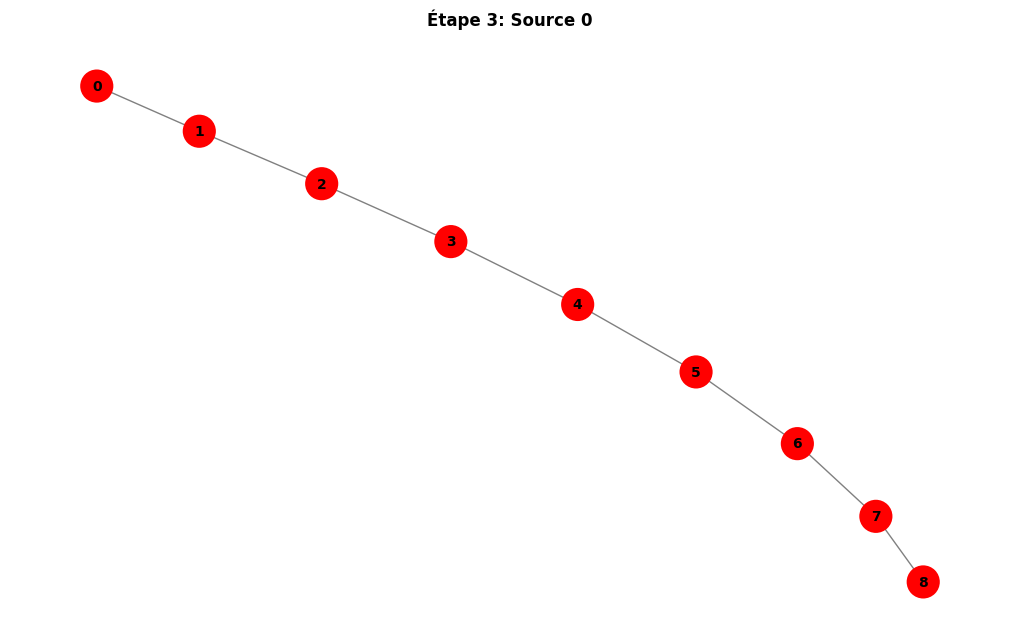

In [34]:
visualiser_graphe_par_etape(graphe, [centre for centre, rayon in sequence_opt])


In [ ]:
def couverture_balle_timing(graphe):
    """
    Retourne la séquence finale (liste des couples (sommet, rayon+1)) et
    une liste 'time_data' contenant tous les états candidats rencontrés durant l'exécution.
    
    Chaque enregistrement de 'time_data' est un tuple composé de :
      - Le temps (en secondes) écoulé depuis le début.
      - Le rayon maximum (current_max_r) pour cet état.
      - Le sommet actuellement utilisé (source de feu) pour cet état.
      - La séquence complète des coups (c'est-à-dire la liste des (sommet, rayon)) jusqu'à cet état.
    """
    start_time = time.time()
    time_data = []  # on va y enregistrer tous les états candidats
    n = len(graphe)
    V = list(graphe.keys())
    
    best_sequence = None
    best_max_r = float('inf')
    best_num_balls = float('inf')
    max_rayon_possible = math.ceil(math.sqrt(n))
    
    # Initialisation de la file de priorité.
    # Chaque élément est un tuple : (heuristique, current_max_r, current_num, brules, seq, used_r)
    heap = []
    heapq.heappush(heap, (0, 0, 0, set(), [], set()))
    memo = defaultdict(lambda: (float('inf'), float('inf')))
    
    while heap:
        heur, current_max_r, current_num, brules, seq, used_r = heapq.heappop(heap)
        current_time = time.time() - start_time
        
        # Enregistrement de l'état courant (celui que l'on vient de dépiler) :
        current_state_vertex = seq[-1][0] if seq else None
        time_data.append((current_time, current_max_r, current_state_vertex))
        
        # On abandonne cette branche si on sait déjà qu'elle est moins bonne que la meilleure solution connue.
        if current_max_r > best_max_r or (current_max_r == best_max_r and current_num >= best_num_balls):
            continue
        
        # Si l'état courant correspond à une solution complète (tous les sommets brûlés),
        # on met à jour la solution optimale (mais on continue d'enregistrer l'état)
        if len(brules) == n:
            if current_max_r < best_max_r or (current_max_r == best_max_r and current_num < best_num_balls):
                best_max_r, best_num_balls, best_sequence = current_max_r, current_num, seq
            # Même si c'est une solution complète, on continue l'exploration (pour enregistrer tous les états)
            continue
        
        # Exploration des prochaines possibilités
        for v in V:
            if v not in brules:
                max_possible_r = min(max_rayon_possible, best_max_r)
                for r in range(max_possible_r - 1, -1, -1):
                    if r in used_r:
                        continue

                    burned_with_ball = bruler(graphe, v, r)  # Assurez-vous que 'bruler' est définie et retourne un ensemble de sommets
                    nouveaux_brules = brules | burned_with_ball
                    new_max_r = max(current_max_r, r)
                    new_num = current_num + 1

                    key = (frozenset(nouveaux_brules), frozenset(used_r | {r}))
                    
                    if (new_max_r, new_num) >= memo[key]:
                        continue
                    memo[key] = (new_max_r, new_num)
                    
                    # Enregistrement de l'état candidat généré juste avant de l'ajouter à la file
                    candidate_time = time.time() - start_time
                    candidate_seq = seq + [(v, r)]
                    time_data.append((candidate_time, new_max_r, v))
                    
                    remaining = n - len(nouveaux_brules)
                    heuristic = new_max_r + (remaining / n)
                    heapq.heappush(heap, (heuristic, new_max_r, new_num, nouveaux_brules, candidate_seq, used_r | {r}))
    
    final_time = time.time() - start_time
    # Enregistrement final de l'état optimal (s'il existe)
    final_vertex = best_sequence[-1][0] if best_sequence and len(best_sequence) > 0 else None
    time_data.append((final_time, best_max_r, final_vertex))
    
    if best_sequence is None:
        return [], time_data
    
    # On retourne la séquence finale (en ajustant le rayon si nécessaire) et tous les enregistrements.
    res = [(center, rayon + 1) for center, rayon in best_sequence]
    return res, time_data


In [ ]:
centres_rayons, time_data = couverture_balle_timing(graphe)
#cout_bb = max([rayon for centre, rayon in sequence_opt])

centres_rayons

In [ ]:
sequence = [centre for centre, rayon in centres_rayons]
data = [(t, burning, balles) for t, burning, balles in time_data if balles in sequence]

plt.figure(figsize=(20, 5))

for centre in set(balles for _, _, balles in data):
    plt.plot(
        [t for t, burning, balles in data if balles == centre],
        [burning for t, burning, balles in data if balles == centre],
        label=f"Ballon {centre}"
    )

plt.xlabel("Temps d'exécution (s)")
plt.ylabel("Burning number")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Création d'un dictionnaire pour regrouper les données par "balles"
grouped_data = {}
for t, burning, balles, l in time_data:
    if (balles not in grouped_data):
        grouped_data[balles] = {'time': [], 'burning': []}
    grouped_data[balles]['time'].append(t)
    grouped_data[balles]['burning'].append(burning)

# Tracé des courbes pour chaque groupe
plt.figure(figsize=(12, 6))
for balles, data in grouped_data.items():
    plt.plot(data['time'], data['burning'], 'o-', label=f"Balles : {balles}")

plt.xlabel("Temps d'exécution (s)")
plt.ylabel("Burning number")
plt.legend()
plt.grid(True)
plt.show()

- imposer un limite de 10s -> faire la recherche pendant max 10s
- tester pour diff periode de temps, arreter après avoir passer cette periode de temps, et voir au bout de quel moment arrive à un solution optimale (ou meme comparer la qté de a solution)

=> figure : 
- x : periode d'exec
- y : burning number
- clé : diff graphe


(HPC serveur frontal de l'isima => faire assez de calcule en paralelle qu'on veux)

- bruler le graphe à un certain rayon et calculer ça connectivité 
- calculer le nbr de composant connexe ( à chercher ça def)
- diametre = le nbr de sommet entre les deux sommet les plus éloigné du graphe

objectif : relaxation linéaire pour les petits graphes

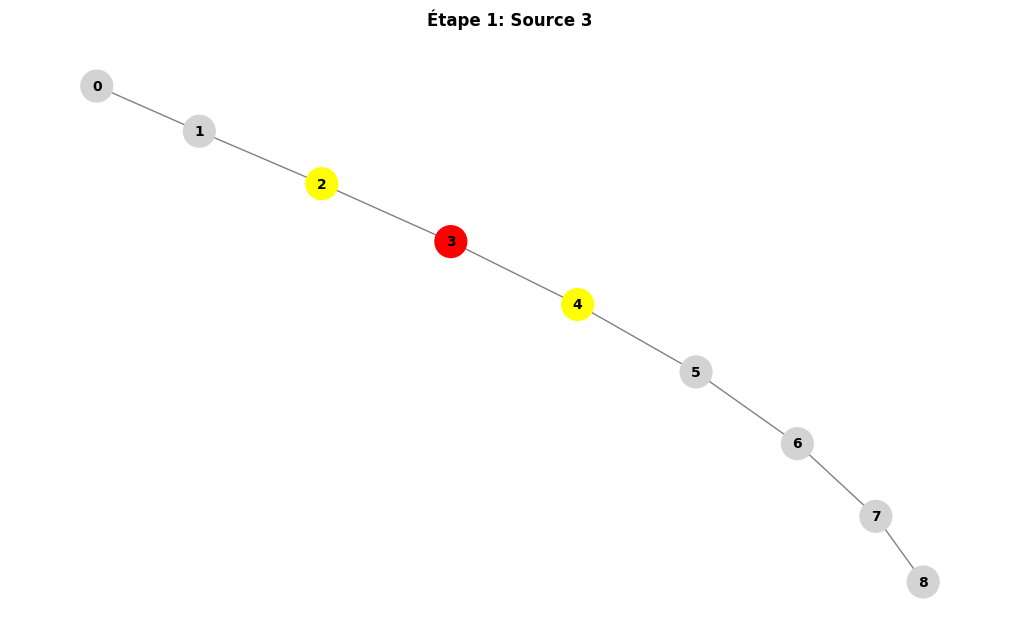

KeyError: 9

In [32]:
visualiser_graphe_par_etape(graphe, [3, 9, 13, 15])